# Visualize a sampled mansion

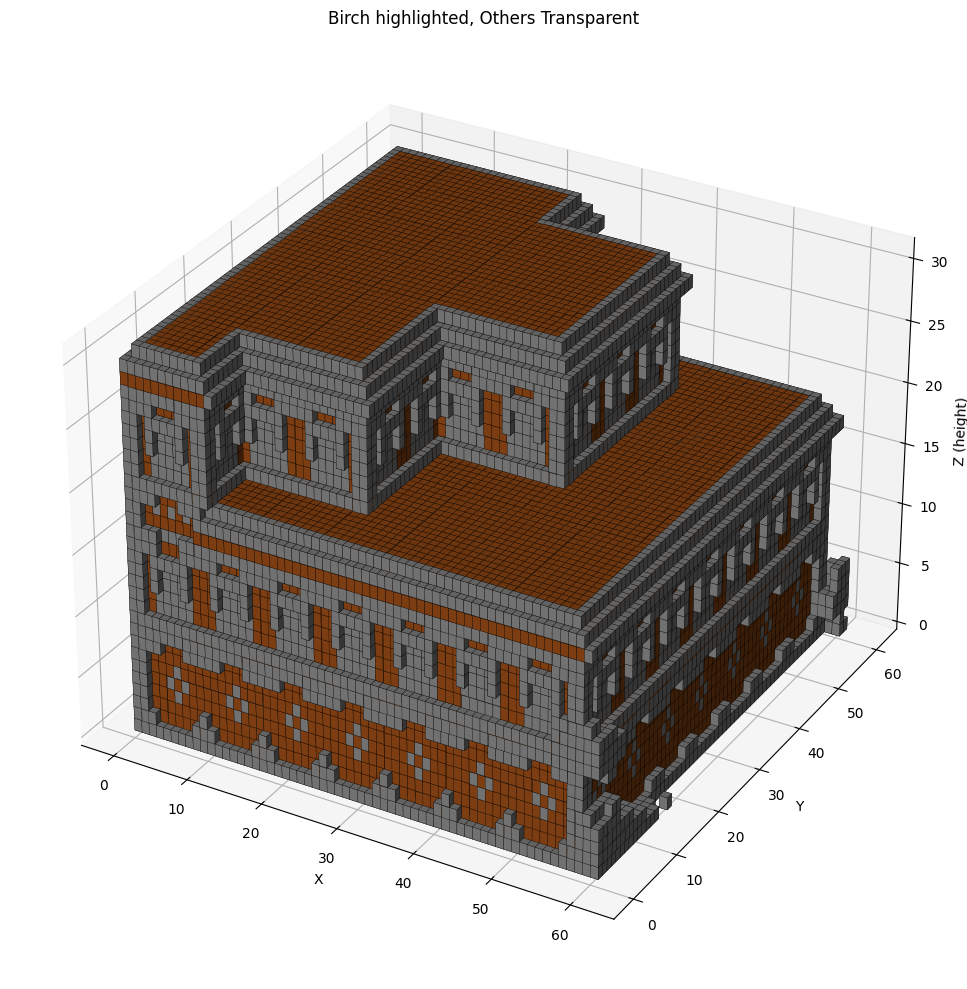

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

file_name= "mansion9.csv"
df = pd.read_csv(file_name)
df = df[df['block'] != 'minecraft:air']

max_x, max_y, max_z = df[['x', 'y', 'z']].max() + 1
shape = (max_x, max_z, max_y)


volume = np.zeros(shape, dtype=bool)
facecolors = np.empty(shape, dtype=object)
alphas = np.zeros(shape)


for _, row in df.iterrows():
    x, y, z = int(row['x']), int(row['y']), int(row['z'])
    bx, by, bz = x, z, y  
    block = row['block']

    volume[bx, by, bz] = True

    if block == 'minecraft:birch_planks':
        facecolors[bx, by, bz] = 'sandybrown'
        alphas[bx, by, bz] = 1.0  
    elif block == 'minecraft:dark_oak_planks':
        facecolors[bx, by, bz] = 'saddlebrown'
        alphas[bx, by, bz] = 0.5  
    else:
        facecolors[bx, by, bz] = 'gray'
        alphas[bx, by, bz] = 0.1  

# givve colors
from matplotlib.colors import to_rgba
rgba = np.empty(shape + (4,), dtype=float)

for idx, val in np.ndenumerate(facecolors):
    rgba[idx] = to_rgba(val, alphas[idx]) if val else (0, 0, 0, 0)

# visualize
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(volume, facecolors=rgba, edgecolor='k', linewidth=0.2)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z (height)")
plt.title("Birch highlighted, Others Transparent")
plt.tight_layout()
plt.show()


# Block Typle Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# collect from all mansion.csv files
block_counts_total = pd.Series(dtype=int)

for i in range(10):
    file = Path(f"mansion{i}.csv")
    if not file.exists():
        print(f"⚠️ Warning: {file} not found, skipping.")
        continue
    df = pd.read_csv(file)
    counts = df['block'].value_counts()
    block_counts_total = block_counts_total.add(counts, fill_value=0).astype(int)

#sort
block_counts_total = block_counts_total.sort_values(ascending=False)

#
print(f"🔢 Total unique block types: {len(block_counts_total)}")
print(block_counts_total)

# Visualize
# chunks = [block_counts_total[i:i+30] for i in range(0, len(block_counts_total), 20)]

# for idx, chunk in enumerate(chunks):
#     plt.figure(figsize=(12, 6))
#     chunk.plot(kind='bar', color='skyblue', edgecolor='black')
#     plt.xlabel('Block Type')
#     plt.ylabel('Total Count')
#     plt.title(f'Block Types by Count (Chunk {idx+1})')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.grid(True, axis='y', linestyle='--', alpha=0.5)
#     plt.show()


# TOp 30 block type and what are them

In [ ]:
import pandas as pd
from pathlib import Path


all_blocks = pd.Series(dtype=int)


for i in range(10):
    file = Path(f"mansion{i}.csv")
    if not file.exists():
        print(f"⚠️ {file} not found, skipping.")
        continue
    df = pd.read_csv(file)
    counts = df['block'].value_counts()
    all_blocks = all_blocks.add(counts, fill_value=0).astype(int)

top20_blocks = all_blocks.sort_values(ascending=False).head(30).index.tolist()
print("📦 Top 30 Block Types (global):")
for b in top20_blocks:
    print(f"- {b}")

print("\n📊 Proportions per mansion:")

# top 30 block 
for i in range(10):
    file = Path(f"mansion{i}.csv")
    if not file.exists():
        continue
    df = pd.read_csv(file)
    total = len(df)
    top_count = df[df['block'].isin(top20_blocks)].shape[0]
    ratio = top_count / total
    print(f"mansion{i}.csv → Top30: {top_count}/{total} = {ratio:.2%}")


# # Filter non top 30 Add white wool, delete leaf_liter

In [2]:
import pandas as pd
from pathlib import Path

# ✅ 设置保留的前 N 个方块数
N = 30

# 获取前 N 个 block，去掉 leaf_litter，加上 white_wool
top_blocks = block_counts_total.head(N).index.tolist()

# 去掉 leaf_litter
if 'minecraft:leaf_litter' in top_blocks:
    top_blocks.remove('minecraft:leaf_litter')

# 加入 white_wool
if 'minecraft:white_wool' not in top_blocks:
    top_blocks.append('minecraft:white_wool')

allowed_blocks = set(top_blocks)

print(f"🧱 Final allowed blocks ({len(allowed_blocks)} total):")
for b in allowed_blocks:
    print("  -", b)

# 批量处理 mansionX.csv
for i in range(10):
    file = Path(f"mansion{i}.csv")
    if not file.exists():
        print(f"⚠️ mansion{i}.csv not found, skipping.")
        continue

    df = pd.read_csv(file)
    df['block'] = df['block'].apply(lambda b: b if b in allowed_blocks else "minecraft:air")
    df.to_csv(f"mansion{i}_labeled.csv", index=False)
    print(f"✅ Saved mansion{i}_labeled.csv (kept {len(allowed_blocks)} blocks)")


🧱 Final allowed blocks (30 total):
  - minecraft:birch_leaves
  - minecraft:grass_block
  - minecraft:torch
  - minecraft:dark_oak_log
  - minecraft:bookshelf
  - minecraft:red_carpet
  - minecraft:white_carpet
  - minecraft:air
  - minecraft:birch_planks
  - minecraft:oak_leaves
  - minecraft:cobblestone
  - minecraft:dark_oak_planks
  - minecraft:oak_fence
  - minecraft:glass_pane
  - minecraft:dark_oak_stairs
  - minecraft:oak_slab
  - minecraft:oak_stairs
  - minecraft:smooth_stone_slab
  - minecraft:oak_planks
  - minecraft:birch_stairs
  - minecraft:white_wool
  - minecraft:dirt
  - minecraft:dark_oak_fence
  - minecraft:stone
  - minecraft:light_gray_wool
  - minecraft:black_wool
  - minecraft:polished_andesite
  - minecraft:cobblestone_wall
  - minecraft:cobblestone_stairs
  - minecraft:dark_oak_leaves
✅ Saved mansion0_labeled.csv (kept 30 blocks)
✅ Saved mansion1_labeled.csv (kept 30 blocks)
✅ Saved mansion2_labeled.csv (kept 30 blocks)
✅ Saved mansion3_labeled.csv (kept 30 bl

# Where floors are

In [ ]:
import pandas as pd
from pathlib import Path
from collections import defaultdict

carpet_blocks = {"minecraft:red_carpet", "minecraft:white_carpet"}


for i in range(10):
    file = Path(f"mansion{i}_labeled.csv")
    if not file.exists():
        print(f"⚠️ {file} not found, skipping.")
        continue

    df = pd.read_csv(file)
    carpet_rows = df[df['block'].isin(carpet_blocks)]

    
    y_counter = defaultdict(int)
    for y in carpet_rows['y']:
        y_counter[int(y)] += 1

    #  top 3 carpet frequecnies y（floor = carpet y - 1）
    top_y = sorted(y_counter.items(), key=lambda x: x[1], reverse=True)[:3]
    floor_levels = sorted([y - 1 for y, _ in top_y])

    print(f"🏠 mansion{i} floor detected at y ：{floor_levels}")


🏠 mansion0 检测地板 y 层：[0, 8, 19]
🏠 mansion1 检测地板 y 层：[0, 8, 19]
🏠 mansion2 检测地板 y 层：[0, 8, 19]
🏠 mansion3 检测地板 y 层：[0, 8, 19]
🏠 mansion4 检测地板 y 层：[0, 8, 19]
🏠 mansion5 检测地板 y 层：[0, 8, 19]
🏠 mansion6 检测地板 y 层：[0, 8, 19]
🏠 mansion7 检测地板 y 层：[0, 8, 19]
🏠 mansion8 检测地板 y 层：[0, 8, 19]
🏠 mansion9 检测地板 y 层：[0, 8, 19]


# add lables_id to csv files

In [ ]:
import pandas as pd
from pathlib import Path


block_list = [
    'minecraft:air', 'minecraft:birch_leaves', 'minecraft:birch_planks', 'minecraft:birch_stairs',
    'minecraft:black_wool', 'minecraft:bookshelf', 'minecraft:cobblestone', 'minecraft:cobblestone_stairs',
    'minecraft:cobblestone_wall', 'minecraft:dark_oak_fence', 'minecraft:dark_oak_leaves',
    'minecraft:dark_oak_log', 'minecraft:dark_oak_planks', 'minecraft:dark_oak_stairs', 'minecraft:dirt',
    'minecraft:glass_pane', 'minecraft:grass_block', 'minecraft:light_gray_wool', 'minecraft:oak_fence',
    'minecraft:oak_leaves', 'minecraft:oak_planks', 'minecraft:oak_slab', 'minecraft:oak_stairs',
    'minecraft:polished_andesite', 'minecraft:red_carpet', 'minecraft:smooth_stone_slab', 'minecraft:stone',
    'minecraft:torch', 'minecraft:white_carpet', 'minecraft:white_wool'
]

block_to_id = {block: i for i, block in enumerate(block_list)}

for i in range(10):
    file = Path(f"mansion{i}_labeled.csv")
    if not file.exists():
        print(f"❌ {file} not found, skipping.")
        continue

    df = pd.read_csv(file)

    # label to uint8
    df['label'] = df['block'].map(block_to_id).astype('uint8')

    # 
    df.to_csv(file, index=False)
    print(f"✅ mansion{i}_labeled.csv updated with 'label' column.")


✅ mansion0_labeled.csv updated with 'label' column.
✅ mansion1_labeled.csv updated with 'label' column.
✅ mansion2_labeled.csv updated with 'label' column.
✅ mansion3_labeled.csv updated with 'label' column.
✅ mansion4_labeled.csv updated with 'label' column.
✅ mansion5_labeled.csv updated with 'label' column.
✅ mansion6_labeled.csv updated with 'label' column.
✅ mansion7_labeled.csv updated with 'label' column.
✅ mansion8_labeled.csv updated with 'label' column.
✅ mansion9_labeled.csv updated with 'label' column.


# Testing new lable_id csv files

In [ ]:
import pandas as pd
from pathlib import Path


block_list = [
    'minecraft:air', 'minecraft:birch_leaves', 'minecraft:birch_planks', 'minecraft:birch_stairs',
    'minecraft:black_wool', 'minecraft:bookshelf', 'minecraft:cobblestone', 'minecraft:cobblestone_stairs',
    'minecraft:cobblestone_wall', 'minecraft:dark_oak_fence', 'minecraft:dark_oak_leaves',
    'minecraft:dark_oak_log', 'minecraft:dark_oak_planks', 'minecraft:dark_oak_stairs', 'minecraft:dirt',
    'minecraft:glass_pane', 'minecraft:grass_block', 'minecraft:light_gray_wool', 'minecraft:oak_fence',
    'minecraft:oak_leaves', 'minecraft:oak_planks', 'minecraft:oak_slab', 'minecraft:oak_stairs',
    'minecraft:polished_andesite', 'minecraft:red_carpet', 'minecraft:smooth_stone_slab', 'minecraft:stone',
    'minecraft:torch', 'minecraft:white_carpet', 'minecraft:white_wool'
]
block_to_id = {block: i for i, block in enumerate(block_list)}

error_found = False


for i in range(10):
    file = Path(f"mansion{i}_labeled.csv")
    print(f"🔍 checking{file.name}...")
    
    if not file.exists():
        print(f"❌ missing file {file}")
        continue

    df = pd.read_csv(file)

    # 1. col
    required_cols = {'x', 'y', 'z', 'block', 'label'}
    if not required_cols.issubset(df.columns):
        print(f"❌ missing col:{required_cols - set(df.columns)}")
        error_found = True
        continue

    # 2. undefined block
    unknown_blocks = set(df['block']) - set(block_list)
    if unknown_blocks:
        print(f"❌ undefined block type: {unknown_blocks}")
        error_found = True

    # 3. lable id m
    mismatched = df[df['block'].map(block_to_id) != df['label']]
    if not mismatched.empty:
        print(f"❌ 存在 block ↔ label 映射不匹配的行，共 {len(mismatched)} 行。示例：")
        print(mismatched.head(5))
        error_found = True

    print(f"✅ {file.name} finish\n")

if not error_found:
    print("🎉 所有 mansion CSV 均通过检查，无误！")
else:
    print("⚠️ 检查发现问题，请根据上方提示修复。")


🔍 正在检查 mansion0_labeled.csv...
✅ mansion0_labeled.csv 检查完成

🔍 正在检查 mansion1_labeled.csv...
✅ mansion1_labeled.csv 检查完成

🔍 正在检查 mansion2_labeled.csv...
✅ mansion2_labeled.csv 检查完成

🔍 正在检查 mansion3_labeled.csv...
✅ mansion3_labeled.csv 检查完成

🔍 正在检查 mansion4_labeled.csv...
✅ mansion4_labeled.csv 检查完成

🔍 正在检查 mansion5_labeled.csv...
✅ mansion5_labeled.csv 检查完成

🔍 正在检查 mansion6_labeled.csv...
✅ mansion6_labeled.csv 检查完成

🔍 正在检查 mansion7_labeled.csv...
✅ mansion7_labeled.csv 检查完成

🔍 正在检查 mansion8_labeled.csv...
✅ mansion8_labeled.csv 检查完成

🔍 正在检查 mansion9_labeled.csv...
✅ mansion9_labeled.csv 检查完成

🎉 所有 mansion CSV 均通过检查，无误！


# Count samples and check whether exceed floor&celling

In [30]:
import pandas as pd
import numpy as np
from pathlib import Path

# 参数设置
patch_size = (16, 12, 16)  # x, y, z
stride = 1
floor_levels = [0, 8, 19]  # 每层楼地板 y 起点
unknown_label = 30

for i in range(0, 10):  # 跳过 mansion0
    csv_path = f"mansion{i}_labeled.csv"
    output_root = Path(f"dataset/mansion{i}/")

    print(f"\n🚀 开始处理 {csv_path}...")
    
    if not Path(csv_path).exists():
        print(f"❌ 找不到文件 {csv_path}，跳过。")
        continue

    # 1. 构建 voxel grid
    df = pd.read_csv(csv_path)
    max_x = df['x'].max() + 1
    max_y = df['y'].max() + 1
    max_z = df['z'].max() + 1

    grid = np.full((max_x, max_y, max_z), fill_value=unknown_label, dtype=np.uint8)
    for _, row in df.iterrows():
        x, y, z = int(row['x']), int(row['y']), int(row['z'])
        grid[x, y, z] = int(row['label'])

    print(f"✅ voxel grid 构建完成，形状: {grid.shape}")

    # 2. 遍历楼层
    px, py, pz = patch_size

    for floor_id, y_start in enumerate(floor_levels):
        y_limit = y_start + py
        if y_limit > grid.shape[1]:
            print(f"⚠️ 跳过楼层 {floor_id}，超出 y 边界。")
            continue

        output_dir = output_root / f"floor{floor_id}"
        output_dir.mkdir(parents=True, exist_ok=True)

        # 正确 cutoff：包含下一层地板，但不超过
        if floor_id < len(floor_levels) - 1:
            next_floor_y = floor_levels[floor_id + 1]
            cutoff = (next_floor_y - y_start) + 1  # 地板也算在内
            cutoff = min(cutoff, py)
        else:
            cutoff = py  # 最后一层无限制

        count = 0
        for x in range(0, grid.shape[0] - px + 1, stride):
            for z in range(0, grid.shape[2] - pz + 1, stride):
                patch = grid[x:x+px, y_start:y_start+py, z:z+pz].copy()

                if cutoff < py:
                    patch[:, cutoff:, :] = unknown_label

                filename = f"patch_x{x:03d}_y{y_start:03d}_z{z:03d}.npy"
                np.save(output_dir / filename, patch)
                count += 1

        print(f"✅ floor{floor_id} 提取 patch 数量: {count}")



🚀 开始处理 mansion1_labeled.csv...
✅ voxel grid 构建完成，形状: (60, 32, 76)
✅ floor0 提取 patch 数量: 2745
✅ floor1 提取 patch 数量: 2745
✅ floor2 提取 patch 数量: 2745

🚀 开始处理 mansion2_labeled.csv...
✅ voxel grid 构建完成，形状: (61, 32, 69)
✅ floor0 提取 patch 数量: 2484
✅ floor1 提取 patch 数量: 2484
✅ floor2 提取 patch 数量: 2484

🚀 开始处理 mansion3_labeled.csv...
✅ voxel grid 构建完成，形状: (77, 32, 61)
✅ floor0 提取 patch 数量: 2852
✅ floor1 提取 patch 数量: 2852
✅ floor2 提取 patch 数量: 2852

🚀 开始处理 mansion4_labeled.csv...
✅ voxel grid 构建完成，形状: (61, 32, 77)
✅ floor0 提取 patch 数量: 2852
✅ floor1 提取 patch 数量: 2852
✅ floor2 提取 patch 数量: 2852

🚀 开始处理 mansion5_labeled.csv...
✅ voxel grid 构建完成，形状: (61, 32, 77)
✅ floor0 提取 patch 数量: 2852
✅ floor1 提取 patch 数量: 2852
✅ floor2 提取 patch 数量: 2852

🚀 开始处理 mansion6_labeled.csv...
✅ voxel grid 构建完成，形状: (77, 32, 61)
✅ floor0 提取 patch 数量: 2852
✅ floor1 提取 patch 数量: 2852
✅ floor2 提取 patch 数量: 2852

🚀 开始处理 mansion7_labeled.csv...
✅ voxel grid 构建完成，形状: (61, 32, 77)
✅ floor0 提取 patch 数量: 2852
✅ floor1 提取 patch 

# visualize 20 of them 

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import colors
# from pathlib import Path
# import random

# # 1. 收集所有 patch 路径
# all_patches = list(Path("dataset").rglob("patch_*.npy"))
# print(f"🔍 共找到 {len(all_patches)} 个 patch")

# # 2. 随机抽样 20 个
# sample_number = 20
# random.seed(42)  # 可重复
# selected = random.sample(all_patches, sample_number)

# # 3. 可视化函数
# def visualize_patch(patch_path):
#     patch = np.load(patch_path)

#     # 转为 X, Z, Y 顺序
#     patch_vis = np.transpose(patch, (0, 2, 1))
#     ignore_labels = {0, 30}
#     mask = ~np.isin(patch_vis, list(ignore_labels))

#     cmap = plt.cm.get_cmap("tab20b", 31)
#     facecolors = np.empty(patch_vis.shape + (4,), dtype=float)
#     facecolors[:] = [0, 0, 0, 0]
#     facecolors[mask] = cmap(patch_vis % 31)[mask]

#     fig = plt.figure(figsize=(6, 6))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.voxels(mask, facecolors=facecolors, edgecolor='k', linewidth=0.2)

#     ax.set_xlabel("X")
#     ax.set_ylabel("Z")
#     ax.set_zlabel("Y")
#     plt.title(patch_path.name)
#     plt.tight_layout()
#     plt.show()

# # 4. 展示 20 个
# for i, patch_path in enumerate(selected):
#     print(f"\n🧱 ({i+1}/20) 可视化: {patch_path}")
#     visualize_patch(patch_path)


# random select 100 of them and dump them to csv file, to be later constructed in minecraft

In [ ]:
# import numpy as np
# import pandas as pd
# from pathlib import Path
# import random

# # 映射表（含 label 30 → "minecraft:air"）
# label_to_block = [
#     'minecraft:air', 'minecraft:birch_leaves', 'minecraft:birch_planks', 'minecraft:birch_stairs',
#     'minecraft:black_wool', 'minecraft:bookshelf', 'minecraft:cobblestone', 'minecraft:cobblestone_stairs',
#     'minecraft:cobblestone_wall', 'minecraft:dark_oak_fence', 'minecraft:dark_oak_leaves',
#     'minecraft:dark_oak_log', 'minecraft:dark_oak_planks', 'minecraft:dark_oak_stairs', 'minecraft:dirt',
#     'minecraft:glass_pane', 'minecraft:grass_block', 'minecraft:light_gray_wool', 'minecraft:oak_fence',
#     'minecraft:oak_leaves', 'minecraft:oak_planks', 'minecraft:oak_slab', 'minecraft:oak_stairs',
#     'minecraft:polished_andesite', 'minecraft:red_carpet', 'minecraft:smooth_stone_slab', 'minecraft:stone',
#     'minecraft:torch', 'minecraft:white_carpet', 'minecraft:white_wool', 'minecraft:air'  # label 30
# ]

# # 1. 搜索所有 patch
# all_patches = list(Path("dataset").rglob("patch_*.npy"))
# print(f"🔍 找到 {len(all_patches)} 个 patch")

# # 2. 随机选取 100 个
# random.seed(42)
# selected = random.sample(all_patches, 100)

# # 3. 构建写入内容
# records = []
# instance_id = 0

# for row in range(10):
#     for col in range(10):
#         patch_path = selected[instance_id]
#         patch = np.load(patch_path)  # shape = (16, 12, 16)

#         # 获取原始起点
#         name = patch_path.stem
#         x0 = int(name.split('_')[1][1:])
#         y0 = int(name.split('_')[2][1:])
#         z0 = int(name.split('_')[3][1:])

#         # 计算 global base 坐标（以 20 格间隔平铺）
#         base_x = col * 20
#         base_z = row * 20

#         # 写入每个 voxel
#         for x in range(16):
#             for y in range(12):
#                 for z in range(16):
#                     label = int(patch[x, y, z])
#                     block = label_to_block[label]
#                     global_x = base_x + x
#                     global_y = y0 + y
#                     global_z = base_z + z
#                     records.append((global_x, global_y, global_z, block))

#         instance_id += 1

# # 4. 保存为 CSV
# df = pd.DataFrame(records, columns=["x", "y", "z", "block"])
# df.to_csv("voxel_patch_grid_10x10.csv", index=False)
# print("✅ 已保存 10×10 grid patch 到 voxel_patch_grid_10x10.csv")


🔍 找到 80823 个 patch
✅ 已保存 10×10 grid patch 到 voxel_patch_grid_10x10.csv
